In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import visuals as vs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler


pd.set_option('display.max_columns', None) # To display all columns


import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
wf = pd.read_csv('data/drug_workfile')
wf.head()

,Unnamed: 0,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Social_Drugs,Party_Drugs,Hard_Drugs
0,0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0
1,1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1
2,2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,1
4,4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0


In [3]:
X = wf[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
y = wf['Party_Drugs']

#### Train-Test-Split

In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) 

#### Random Oversampling

In [5]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1698 samples.
Testing set has 564 samples.


#### Instanciating the model

In [6]:
clf = SVC(random_state = 420)

learner = clf.fit(X_train, y_train)

# Get the predictions on the test set,
# then get predictions on the full training samples
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)

# Compute accuracy on the full training samples
acc_train = accuracy_score(y_train, predictions_train)

# Compute accuracy on test set
acc_test = accuracy_score(y_test, predictions_test)

# Compute F-score on the the full training samples
f_train = fbeta_score(y_train,predictions_train,beta=0.5)

# Compute F-score on the test set
f_test = fbeta_score(y_test,predictions_test,beta=0.5)


#### with f_beta_score 0.5

In [7]:
print (f'Accuracy on trainig data: {acc_train}')
print (f'Accuracy on testing data: {acc_test}')
print (f'F_beta_score on trainig data: {f_train}')
print (f'F_beta_score on test data: {f_test}')

Accuracy on trainig data: 0.8404004711425206
Accuracy on testing data: 0.7712765957446809
F_beta_score on trainig data: 0.8596356171413908
F_beta_score on test data: 0.8593749999999999


In [8]:
print (classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.63      0.85      0.73       200
           1       0.90      0.73      0.80       364

    accuracy                           0.77       564
   macro avg       0.77      0.79      0.76       564
weighted avg       0.81      0.77      0.78       564



Text(0.5, 1.0, 'Confusion matrix for SVC')

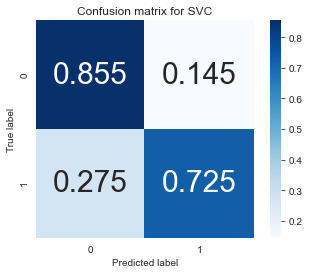

In [9]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure()
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
         cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for SVC')

In [10]:
confusion_matrix(y_test, clf.predict(X_test))

array([[171,  29],
       [100, 264]])

#### Error Analysis / Zooming in on errors (the false positive ones)

In [11]:
X_test.insert(0, "Party_pred", predictions_test)
X_test.insert(1, "Party_test", y_test)
X_test.query("Party_pred == 1 & Party_test == 0")

,Party_pred,Party_test,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
1076,1,0,-0.07854,1,1.16365,0.96082,0.11440,0.31287,1.74091,-0.17779,0.28783,0.58489,0.52975,0.76540
1148,1,0,1.82213,1,1.16365,-0.57009,0.11440,0.31287,-0.69509,-0.71727,-1.21213,-0.27607,0.52975,1.92173
1577,1,0,0.49788,1,1.16365,0.96082,-0.31685,0.73545,2.32338,0.14143,1.81866,0.12331,0.19268,0.76540
1324,1,0,-0.07854,1,0.45468,0.96082,-0.31685,1.83990,-0.80615,1.24033,-1.62090,-1.13788,0.88113,0.40148
431,1,0,1.09449,1,-1.73790,0.96082,-0.31685,0.22393,1.93886,-1.11902,1.28610,-0.14277,1.86203,0.76540
1702,1,0,0.49788,1,-1.22751,0.96082,-0.31685,-0.79151,-0.80615,0.72330,-0.91699,0.25953,-0.71126,-0.21575
490,1,0,1.09449,1,-0.05921,0.96082,-0.31685,0.62967,0.80523,0.44585,-0.30172,-0.78155,1.29221,1.92173
217,1,0,0.49788,0,-0.05921,0.96082,-0.31685,1.23461,0.80523,0.44585,1.45039,-1.64101,1.86203,0.76540
227,1,0,-0.95197,0,-0.61113,0.96082,-0.31685,0.22393,0.96248,-0.97631,-0.60633,0.58489,1.29221,0.40148
321,1,0,1.09449,0,-1.43719,0.96082,-0.31685,0.91093,-1.09207,-1.68062,0.28783,-0.78155,-0.71126,0.07987


In [14]:
fp = X_test.query("Party_pred == 1 & Party_test == 0")
tp = X_test.query("Party_pred == 1 & Party_test == 1")
tn = X_test.query("Party_pred == 0 & Party_test == 0")
tp.describe()

,Party_pred,Party_test,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,264.0,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1.0,1.0,-0.396603,0.333333,-0.235565,-0.147160,-0.285769,0.193106,-0.072791,0.419503,-0.152508,-0.384726,0.385573,0.459090
std,0.0,0.0,0.691297,0.472300,0.832827,0.618158,0.187062,1.072108,1.113488,0.866901,1.042304,0.954111,0.888422,0.819124
min,1.0,1.0,-0.951970,0.000000,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-2.398830,-3.157350,-3.464360,-2.555240,-2.078480
25%,1.0,1.0,-0.951970,0.000000,-0.611130,-0.570090,-0.316850,-0.467250,-0.947790,-0.177790,-0.760960,-1.014500,-0.217120,-0.215750
50%,1.0,1.0,-0.951970,0.000000,-0.611130,-0.570090,-0.316850,0.223930,0.003320,0.445850,-0.154870,-0.405810,0.529750,0.401480
75%,1.0,1.0,-0.078540,1.000000,0.454680,0.249230,-0.316850,0.910930,0.637790,0.927912,0.590420,0.259530,0.881130,1.224700
max,1.0,1.0,2.591710,1.000000,1.984370,0.960820,1.907250,2.821960,3.273930,2.901610,3.464360,2.333370,1.862030,1.921730


#### False Positives - We predict someone to be a drug user based on his survey entries / personality traits but actually he should be neglected from DDD_Corporation

<AxesSubplot:ylabel='SS'>

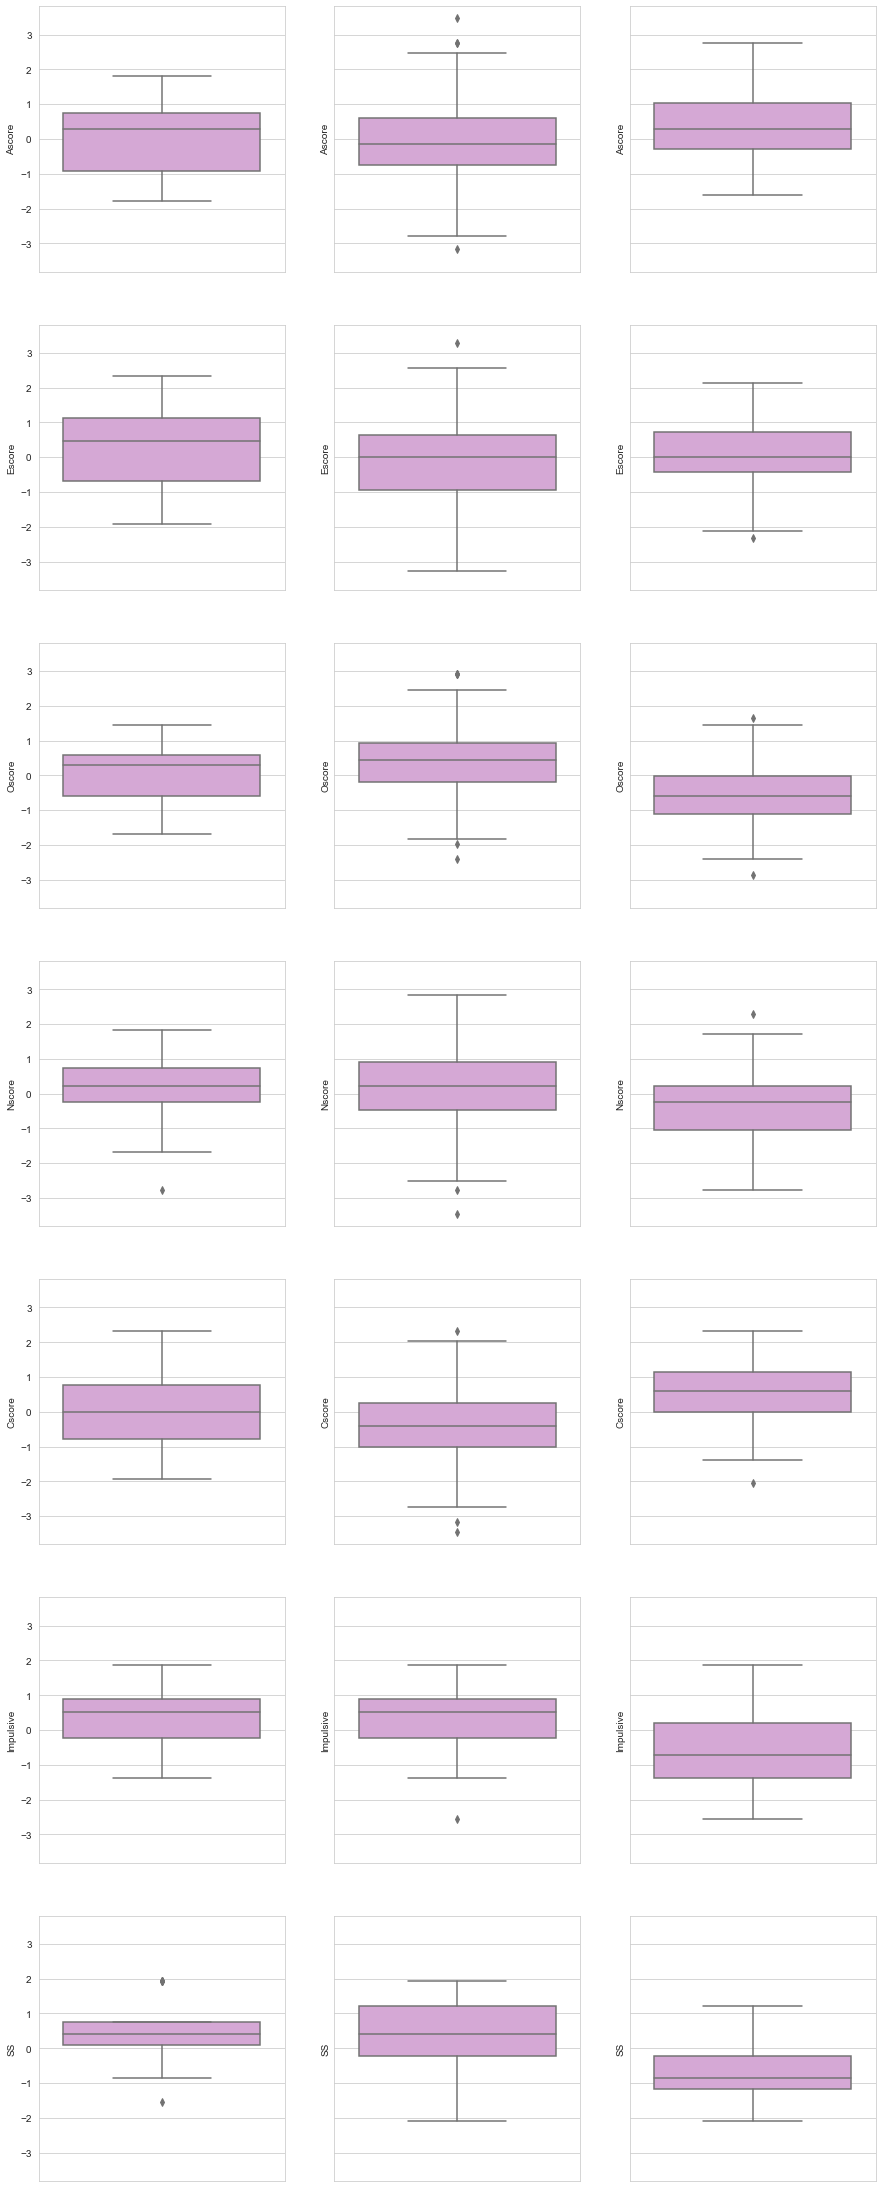

In [40]:
f, axes = plt.subplots(7,3, figsize=(15,40), share=True)
custom_palette = ["plum"]
sns.set_palette(custom_palette)

sns.boxplot(y="Ascore", data=fp, ax=axes[0][0])
sns.boxplot(y="Ascore", data=tp, ax=axes[0][1])
sns.boxplot(y="Ascore", data=tn, ax=axes[0][2])

sns.boxplot(y="Escore", data=fp, ax=axes[1][0])
sns.boxplot(y="Escore", data=tp, ax=axes[1][1])
sns.boxplot(y="Escore", data=tn, ax=axes[1][2])

sns.boxplot(y="Oscore", data=fp, ax=axes[2][0])
sns.boxplot(y="Oscore", data=tp, ax=axes[2][1])
sns.boxplot(y="Oscore", data=tn, ax=axes[2][2])

sns.boxplot(y="Nscore", data=fp, ax=axes[3][0])
sns.boxplot(y="Nscore", data=tp, ax=axes[3][1])
sns.boxplot(y="Nscore", data=tn, ax=axes[3][2])

sns.boxplot(y="Cscore", data=fp, ax=axes[4][0])
sns.boxplot(y="Cscore", data=tp, ax=axes[4][1])
sns.boxplot(y="Cscore", data=tn, ax=axes[4][2])

sns.boxplot(y="Impulsive", data=fp, ax=axes[5][0])
sns.boxplot(y="Impulsive", data=tp, ax=axes[5][1])
sns.boxplot(y="Impulsive", data=tn, ax=axes[5][2])

sns.boxplot(y="SS", data=fp, ax=axes[6][0])
sns.boxplot(y="SS", data=tp, ax=axes[6][1])
sns.boxplot(y="SS", data=tn, ax=axes[6][2])

<AxesSubplot:xlabel='Education', ylabel='count'>

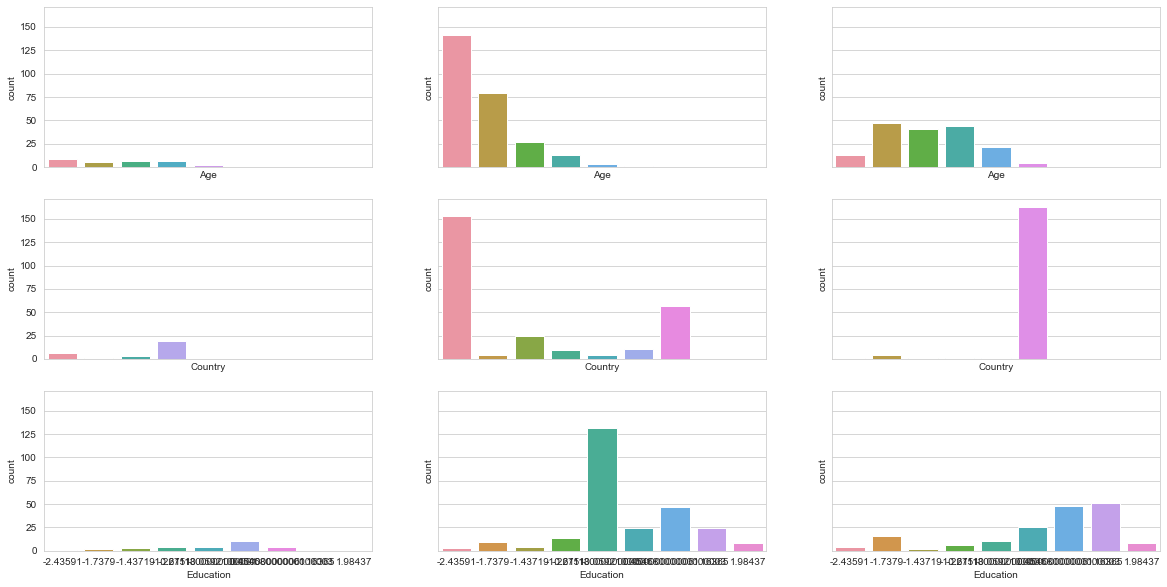

In [38]:
f, axes = plt.subplots(3,3, figsize=(20,10), sharex = True, sharey = True)
custom_palette = ["plum"]
sns.set_palette(custom_palette)

sns.countplot(x="Age", data=fp, ax=axes[0][0])
sns.countplot(x="Age", data=tp, ax=axes[0][1])
sns.countplot(x="Age", data=tn, ax=axes[0][2])

sns.countplot(x="Country", data=fp, ax=axes[1][0])
sns.countplot(x="Country", data=tp, ax=axes[1][1])
sns.countplot(x="Country", data=tn, ax=axes[1][2])

sns.countplot(x="Education", data=fp, ax=axes[2][0])
sns.countplot(x="Education", data=tp, ax=axes[2][1])
sns.countplot(x="Education", data=tn, ax=axes[2][2])

Text(0.5, 1.0, 'True Negatives')

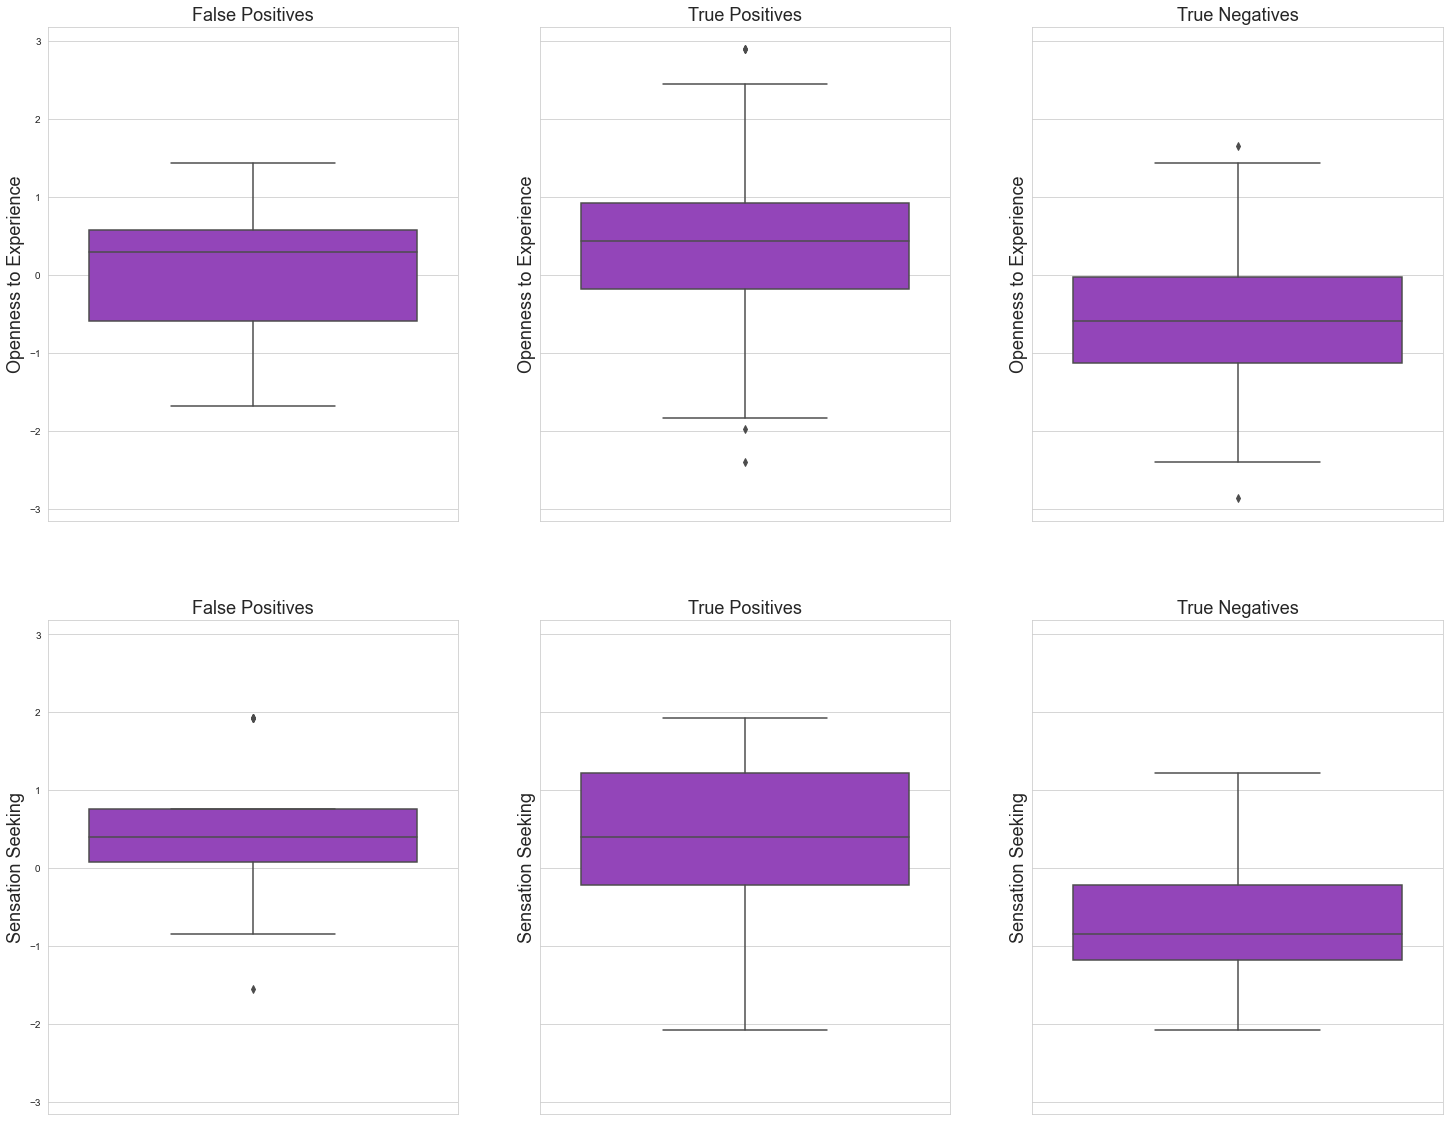

In [55]:
f, axes = plt.subplots(2,3, figsize=(25,20), sharey=True)
custom_palette = ["darkorchid"]
sns.set_palette(custom_palette)

O = sns.boxplot(y="Oscore", data=fp, ax=axes[0][0])
O.set_xlabel("")
O.set_ylabel("Openness to Experience", size=18)
O.set_title("False Positives", size=18)
#O.set(ylim=(-3,8, 3.8))

O2 = sns.boxplot(y="Oscore", data=tp, ax=axes[0][1])
O2.set_xlabel("")
O2.set_ylabel("Openness to Experience", size=18)
O2.set_title("True Positives", size=18)
#O2.set(ylim=(-3,8, 3.8))

O3 = sns.boxplot(y="Oscore", data=tn, ax=axes[0][2])
O3.set_xlabel("")
O3.set_ylabel("Openness to Experience", size=18)
O3.set_title("True Negatives", size=18)
#O3.set(ylim=(-3,8, 3.8))

SS = sns.boxplot(y="SS", data=fp, ax=axes[1][0])
SS.set_xlabel("")
SS.set_ylabel("Sensation Seeking", size=18)
SS.set_title("False Positives", size=18)
#SS.set(ylim=(-3,8, 3.8))

SS1 = sns.boxplot(y="SS", data=tp, ax=axes[1][1])
SS1.set_xlabel("")
SS1.set_ylabel("Sensation Seeking", size=18)
SS1.set_title("True Positives", size=18)
#SS1.set(ylim=(-3,8, 3.8))

SS2 = sns.boxplot(y="SS", data=tn, ax=axes[1][2])
SS2.set_xlabel("")
SS2.set_ylabel("Sensation Seeking", size=18)
SS2.set_title("True Negatives", size=18)
#SS2.set(ylim=(-3,8, 3.8))